### Installing the libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

In [2]:
import os
import mediapipe as mp

### Setting up the MediaPipe Holistic function for video formatting and setting up the camera

In [3]:
mp_holistic = mp.solutions.holistic #mediapipe holistic model
mp_drawing = mp.solutions.drawing_utils #dependancy for drawing out the utilities 

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #converting the color formatb from bgr to rgb
    image.flags.writeable = False                  #making the image non-writable
    results = model.process(image)                 #making the prediction
    image.flags.writeable = True                   #transforming the image back to the writable format 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #converting the color back to rgb
    return image, results

### Function to get the features from the frames

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) #for getting facial features
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) #for getting face outlines
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #for getting pose features
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #getting the left hand features
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #getting the right hand features

In [6]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                         mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )   
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
cap = cv2.VideoCapture(0) 

In [7]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_styled_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('b'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
results.face_landmarks

landmark {
  x: 0.4414001703262329
  y: 0.494382381439209
  z: -0.021495219320058823
}
landmark {
  x: 0.4396972954273224
  y: 0.4565441608428955
  z: -0.04271761327981949
}
landmark {
  x: 0.4410398006439209
  y: 0.4673338532447815
  z: -0.02144545689225197
}
landmark {
  x: 0.43403634428977966
  y: 0.42127904295921326
  z: -0.03267357870936394
}
landmark {
  x: 0.4396307170391083
  y: 0.4457005262374878
  z: -0.04575096815824509
}
landmark {
  x: 0.4400686025619507
  y: 0.43143925070762634
  z: -0.04298413172364235
}
landmark {
  x: 0.441786527633667
  y: 0.39725032448768616
  z: -0.02335793897509575
}
landmark {
  x: 0.3893032670021057
  y: 0.3940240144729614
  z: 0.013002187944948673
}
landmark {
  x: 0.4424807131290436
  y: 0.37643542885780334
  z: -0.019700007513165474
}
landmark {
  x: 0.4426299035549164
  y: 0.3631784915924072
  z: -0.022130420431494713
}
landmark {
  x: 0.4437688887119293
  y: 0.3070778250694275
  z: -0.014381378889083862
}
landmark {
  x: 0.4414854049682617
 

In [9]:
draw_landmarks(frame, results)

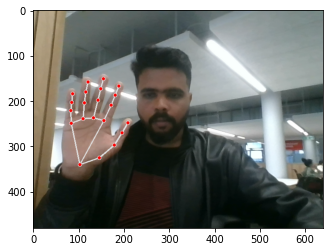

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### Extracting Keypoints - Demo function to extract the features along with the error handling

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

### Setting up folders for data

In [45]:
DATA_PATH = os.path.join('American_Sign_Language') 
actions = np.array(["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"])
no_sequences = 20
sequence_length = 35

### Preprocessing and labelling of the data

In [46]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [47]:
label_map = {label:num for num, label in enumerate(actions)}

In [48]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

### This function will be used for loading the recorded data

In [49]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action]) 

In [50]:
x= np.array(sequences)

In [51]:
np.array(labels).shape

(520,)

In [52]:
x.shape

(520, 35, 1662)

In [53]:
y = to_categorical(labels).astype(int)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05)

In [55]:
x_val.shape

(25, 35, 1662)

In [56]:
x_train.shape

(469, 35, 1662)

In [57]:
x_test.shape

(26, 35, 1662)

In [58]:
y_train.shape

(469, 26)

In [59]:
y_test.shape

(26, 26)

In [60]:
y_test

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Model creation of LSTM and training

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [62]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(35,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
#model.add(Dropout(.4))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(.4))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(.25))
model.add(Dense(actions.shape[0], activation='softmax'))

In [63]:
from tensorflow import keras
from tensorflow.keras import layers
opt = keras.optimizers.Adam(learning_rate=0.001)

In [64]:
import tensorflow as tf

In [65]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [86]:
history=model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100) 

Epoch 1/100
15/15 [==============================] - 6s 205ms/step - loss: 2.8738 - categorical_accuracy: 0.0959 - val_loss: 2.8538 - val_categorical_accuracy: 0.0800
Epoch 2/100
15/15 [==============================] - 3s 180ms/step - loss: 2.8603 - categorical_accuracy: 0.0981 - val_loss: 2.8963 - val_categorical_accuracy: 0.0800
Epoch 3/100
15/15 [==============================] - 3s 185ms/step - loss: 2.8580 - categorical_accuracy: 0.1066 - val_loss: 2.8474 - val_categorical_accuracy: 0.1200
Epoch 4/100
15/15 [==============================] - 4s 257ms/step - loss: 2.8468 - categorical_accuracy: 0.1066 - val_loss: 2.8391 - val_categorical_accuracy: 0.0800
Epoch 5/100
15/15 [==============================] - 2s 164ms/step - loss: 2.8479 - categorical_accuracy: 0.1023 - val_loss: 2.8967 - val_categorical_accuracy: 0.0800
Epoch 6/100
15/15 [==============================] - 3s 173ms/step - loss: 2.8406 - categorical_accuracy: 0.1087 - val_loss: 2.8297 - val_categorical_accuracy: 0.040

Epoch 50/100
15/15 [==============================] - 2s 166ms/step - loss: 2.6644 - categorical_accuracy: 0.1343 - val_loss: 2.6336 - val_categorical_accuracy: 0.0800
Epoch 51/100
15/15 [==============================] - 2s 166ms/step - loss: 2.6138 - categorical_accuracy: 0.1834 - val_loss: 2.6996 - val_categorical_accuracy: 0.0800
Epoch 52/100
15/15 [==============================] - 3s 173ms/step - loss: 2.6422 - categorical_accuracy: 0.1471 - val_loss: 2.6466 - val_categorical_accuracy: 0.1200
Epoch 53/100
15/15 [==============================] - 3s 183ms/step - loss: 2.6258 - categorical_accuracy: 0.1770 - val_loss: 2.6187 - val_categorical_accuracy: 0.2400
Epoch 54/100
15/15 [==============================] - 2s 158ms/step - loss: 2.6253 - categorical_accuracy: 0.1791 - val_loss: 2.5707 - val_categorical_accuracy: 0.2000
Epoch 55/100
15/15 [==============================] - 3s 178ms/step - loss: 2.6210 - categorical_accuracy: 0.2068 - val_loss: 2.6208 - val_categorical_accuracy:

Epoch 99/100
15/15 [==============================] - 2s 168ms/step - loss: 2.3970 - categorical_accuracy: 0.2260 - val_loss: 2.5396 - val_categorical_accuracy: 0.1600
Epoch 100/100
15/15 [==============================] - 2s 162ms/step - loss: 2.3216 - categorical_accuracy: 0.2345 - val_loss: 2.3932 - val_categorical_accuracy: 0.2400


In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 35, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 35, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 26)                858       
                                                                 
Total params: 597,434
Trainable params: 597,434
Non-tr

In [88]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


In [89]:
import matplotlib.pyplot as plt

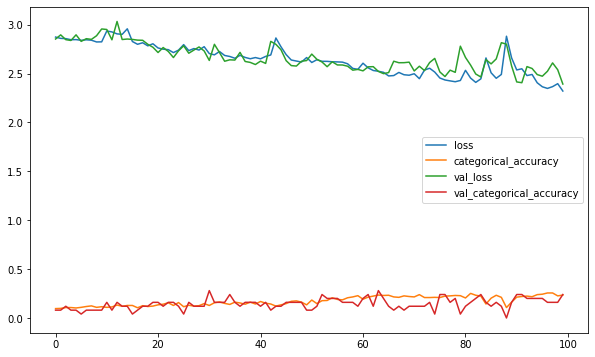

In [90]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.show()

In [91]:
model.predict(x_test)

1/1 [==============================] - 3s 3s/step


array([[5.25262728e-02, 6.04359843e-02, 5.66850975e-02, 5.29943779e-02,
        5.80892414e-02, 6.06957711e-02, 3.60602699e-02, 4.10118587e-02,
        5.03449515e-02, 3.17586362e-02, 4.45322134e-02, 4.24417555e-02,
        6.06749728e-02, 5.84489629e-02, 5.80620170e-02, 5.24838567e-02,
        1.73340216e-02, 9.82308388e-03, 8.46753083e-03, 1.58510618e-02,
        2.47851815e-02, 2.58889142e-02, 2.76514720e-02, 1.86193381e-02,
        2.18296666e-02, 1.25035178e-02],
       [5.25262728e-02, 6.04359843e-02, 5.66850975e-02, 5.29943779e-02,
        5.80892414e-02, 6.06957711e-02, 3.60602699e-02, 4.10118587e-02,
        5.03449515e-02, 3.17586362e-02, 4.45322134e-02, 4.24417555e-02,
        6.06749728e-02, 5.84489629e-02, 5.80620170e-02, 5.24838567e-02,
        1.73340216e-02, 9.82308388e-03, 8.46753083e-03, 1.58510618e-02,
        2.47851815e-02, 2.58889142e-02, 2.76514720e-02, 1.86193381e-02,
        2.18296666e-02, 1.25035178e-02],
       [1.84136480e-02, 3.92369414e-03, 5.66151226e-03

In [92]:
res = model.predict(x_test)

1/1 [==============================] - 3s 3s/step


In [93]:
model.predict(x_train).shape

15/15 [==============================] - 2s 41ms/step


(469, 26)

In [94]:
actions[np.argmax(res[4])]

'X'

In [95]:
actions[np.argmax(y_test[4])]

'T'

In [102]:
model.save('American_alphabets_LSTM.h5')

In [97]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [98]:
yhat = model.predict(x_test)

1/1 [==============================] - 1s 1s/step


In [99]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [100]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[23,  2],
        [ 1,  0]],

       [[24,  0],
        [ 2,  0]],

       [[14, 11],
        [ 0,  1]],

       [[25,  0],
        [ 0,  1]],

       [[25,  1],
        [ 0,  0]],

       [[25,  0],
        [ 1,  0]],

       [[25,  0],
        [ 1,  0]],

       [[23,  0],
        [ 3,  0]],

       [[23,  0],
        [ 3,  0]],

       [[25,  0],
        [ 1,  0]],

       [[24,  0],
        [ 2,  0]],

       [[24,  0],
        [ 0,  2]],

       [[25,  1],
        [ 0,  0]],

       [[24,  0],
        [ 2,  0]],

       [[23,  3],
        [ 0,  0]],

       [[25,  0],
        [ 1,  0]],

       [[23,  1],
        [ 2,  0]],

       [[25,  1],
        [ 0,  0]],

       [[23,  0],
        [ 1,  2]]], dtype=int64)

In [101]:
accuracy_score(ytrue, yhat)

0.23076923076923078

In [ ]:
sequence = []
sentence = []
threshold = 0.8
cap = cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_styled_landmarks(image, results)
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[-35:]
        if len(sequence) == 35:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('b'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()